In [1]:
#Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking anCardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
#this dataset contains 12 features that can be used to predict mortality by heart failure.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
df.shape

(299, 13)

In [5]:
x=df.iloc[:,0:12]
print(x.shape)

(299, 12)


In [6]:
y=df.iloc[:,12]
print(y)
print(y.shape)

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64
(299,)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)
xtrain.shape

(239, 12)

In [9]:
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [11]:
from xgboost import XGBClassifier


In [12]:
xgbc=XGBClassifier()

In [13]:
xgbc.fit(xtrain,ytrain)
ypre=xgbc.predict(xtest)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
accuracy_score(ypre,ytest)

0.8166666666666667

In [16]:
confusion_matrix(ypre,ytest)

array([[33,  7],
       [ 4, 16]], dtype=int64)

In [17]:
print(classification_report(ypre,ytest))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.70      0.80      0.74        20

    accuracy                           0.82        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.83      0.82      0.82        60



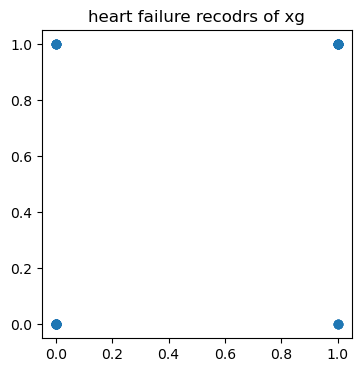

In [18]:
plt.figure(figsize=(4,4))
plt.title('heart failure recodrs of xg')
plt.scatter(ypre,ytest)
plt.show()

In [19]:
from sklearn.svm import SVC


In [20]:
svc=SVC()

In [21]:
svc.fit(xtrain,ytrain)

SVC()

In [22]:
ypresvc=svc.predict(xtest)

In [23]:
accuracy_score(ypresvc,ytest)

0.8

In [24]:
confusion_matrix(ypresvc,ytest)

array([[35, 10],
       [ 2, 13]], dtype=int64)

In [25]:
print(classification_report(ypresvc,ytest))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85        45
           1       0.57      0.87      0.68        15

    accuracy                           0.80        60
   macro avg       0.76      0.82      0.77        60
weighted avg       0.85      0.80      0.81        60



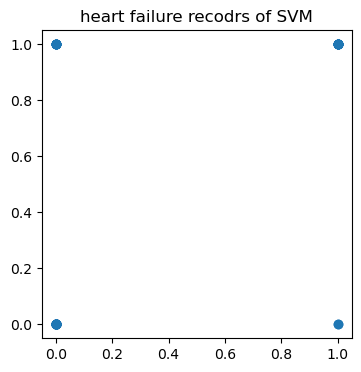

In [26]:
plt.figure(figsize=(4,4))
plt.title('heart failure recodrs of SVM')
plt.scatter(ypresvc,ytest)

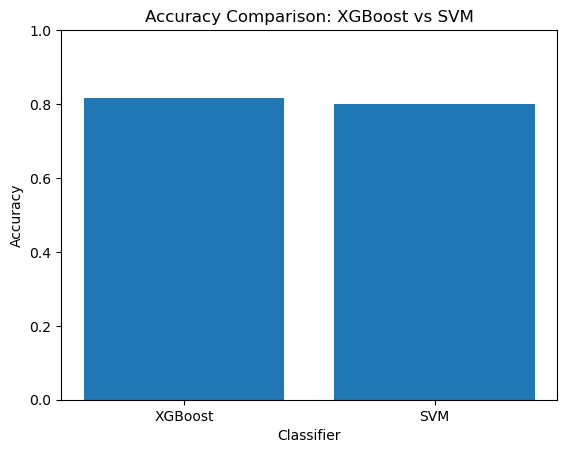

In [27]:
#accuracy comparison of xgboost and SVM 
accuracy_xgboost = 0.8166666666666667
accuracy_svm = 0.8
classifiers = ['XGBoost', 'SVM']
accuracies = [accuracy_xgboost, accuracy_svm]
plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: XGBoost vs SVM')
plt.ylim([0, 1]) 
plt.show()